# Analiza eksploracyjna danych
Dane giełdowe indeksu mwig40 i innych rynków:
- mWIG40
- WIG20
- S&P500
- DAX
- Nikkei225
- Bret (ropa)
- EUR/PLN
- USD/PLN
- vix
- PMI

## Importy i ścieżka do danych

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ścieżki
SCRIPT_DIR = os.getcwd()
PROJECT_ROOT = os.path.abspath(os.path.dirname(SCRIPT_DIR))
OUTPUT_DATA_LAGGED = os.path.join(PROJECT_ROOT, 'dataset_ret_lag.csv')
DATA_PATH = os.path.join(PROJECT_ROOT, 'dataset.csv')
DATA_RET_PATH = os.path.join(PROJECT_ROOT, 'dataset_ret.csv')
PLOTS_DIR = os.path.join(SCRIPT_DIR, 'plots')

# Styl wykresów
TITLE_FONT_SIZE = 18
AXIS_FONT_SIZE = 14
TICK_FONT_SIZE = 12

## Wczytanie danych zsynchronizowanych

In [2]:
df = pd.read_csv(DATA_PATH, sep = ';', decimal = ',')
df.head()

,Data,mwig40_Otwarcie,mwig40_Najwyzszy,mwig40_Najnizszy,mwig40_Zamkniecie,mwig40_Wolumen,dax_Otwarcie,dax_Najwyzszy,dax_Najnizszy,dax_Zamkniecie,...,brent_Zamkniecie,eurpln_Otwarcie,eurpln_Najwyzszy,eurpln_Najnizszy,eurpln_Zamkniecie,pmi_PMI,usdpln_Otwarcie,usdpln_Najwyzszy,usdpln_Najnizszy,usdpln_Zamkniecie
0,2000-01-04,1122.5,1122.5,1098.9,1103.8,1701188.0,6747.24,6755.36,6510.46,6586.95,...,24.39,4.1850,4.2575,4.1850,4.2450,51.1,4.125,4.126,4.0990,4.117
1,2000-01-05,1060.1,1088.9,1060.1,1086.1,1894946.0,6585.85,6585.85,6388.91,6502.07,...,23.73,4.2750,4.3020,4.2476,4.2620,51.1,4.117,4.145,4.0905,4.125
2,2000-01-06,1087.0,1105.4,1086.9,1105.3,1467876.0,6501.45,6539.31,6402.63,6474.92,...,23.62,4.2620,4.2690,4.2065,4.2065,51.1,4.120,4.121,4.0600,4.077
3,2000-01-07,1128.1,1152.1,1128.1,1147.8,3057204.0,6489.94,6791.53,6470.14,6780.96,...,23.09,4.2020,4.2180,4.1792,4.1895,51.1,4.077,4.092,4.0600,4.070
4,2000-01-10,1171.9,1197.7,1171.9,1179.1,3176800.0,6785.47,6975.26,6785.47,6925.52,...,23.78,4.1921,4.1921,4.1489,4.1720,51.1,4.070,4.095,4.0500,4.065


## Analiza danych

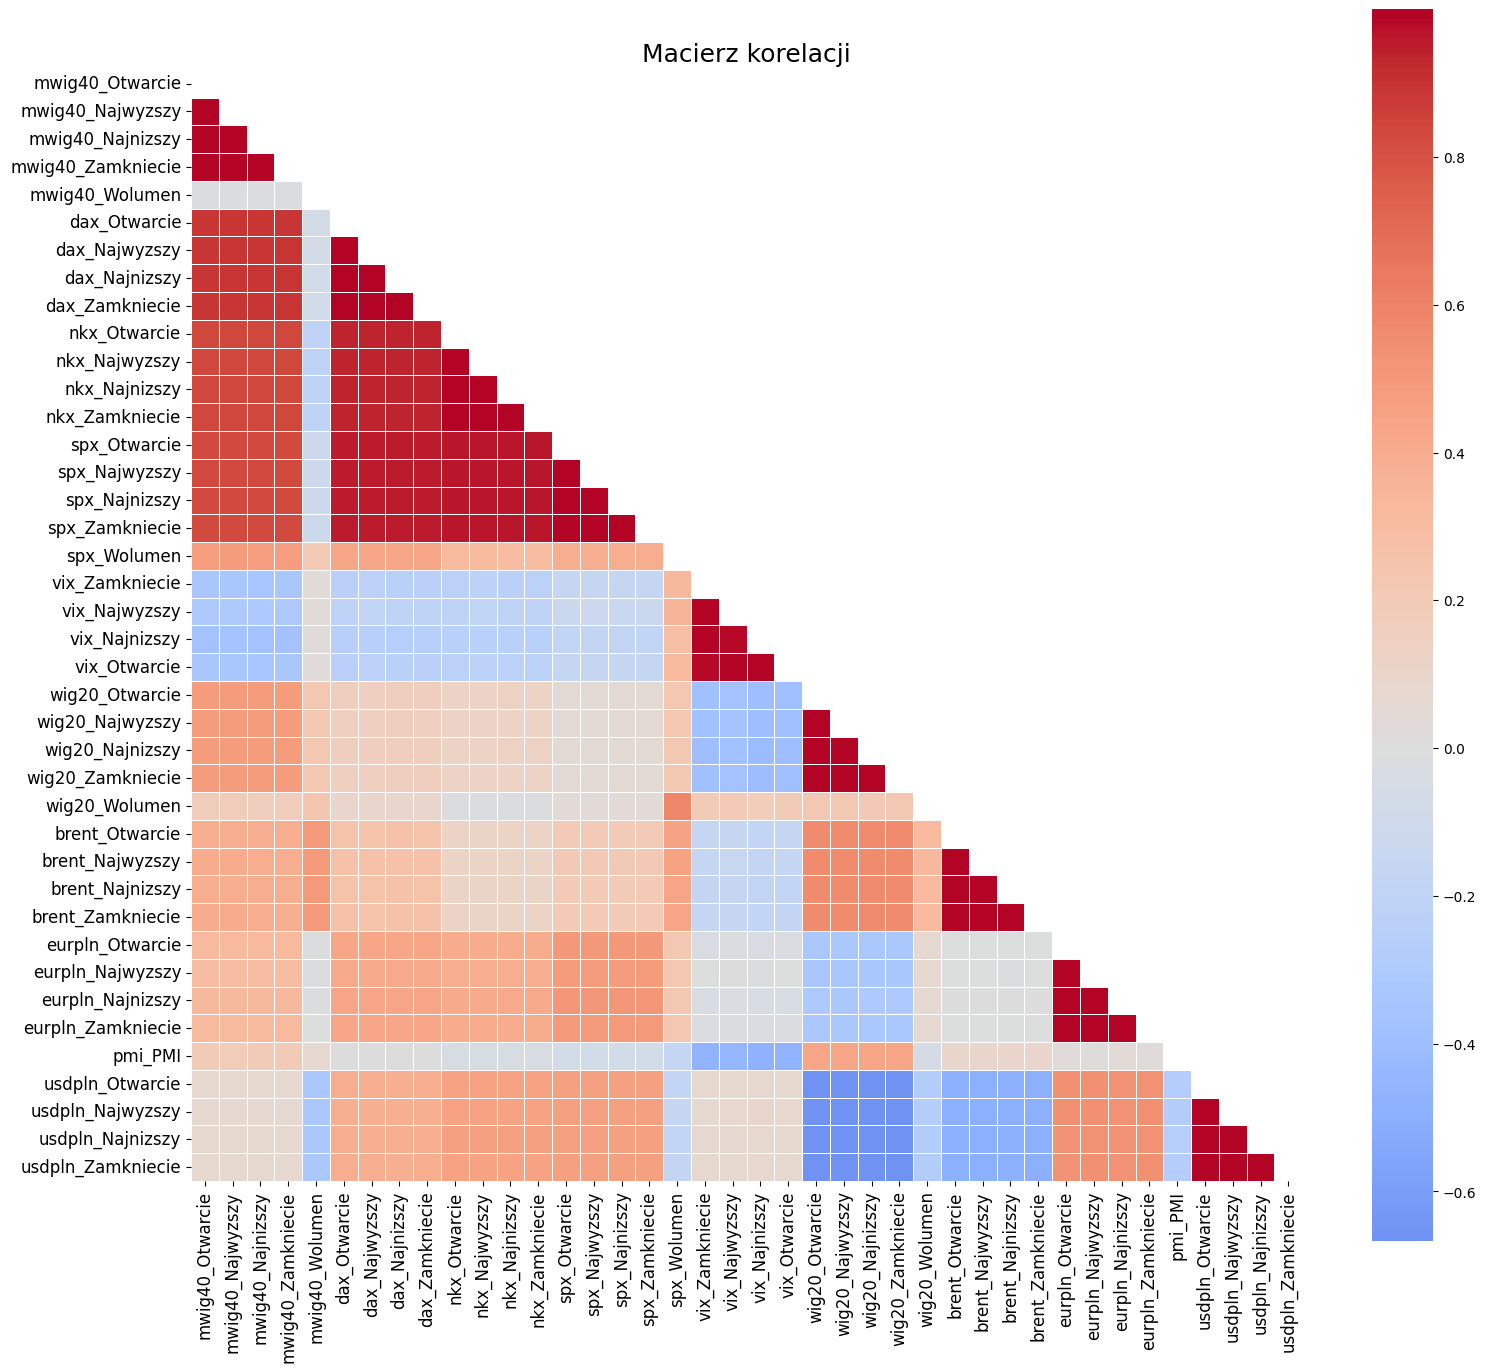

In [7]:
# Macierz korelacji
df_numeric = df.drop(columns=['Data'])
corr_matrix = df_numeric.corr()

# 1. Wykres heatmap
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(
    corr_matrix, 
    mask=mask, 
    cmap='coolwarm', 
    center=0, 
    square=True, 
    linewidths=.5
)

plt.title('Macierz korelacji', fontsize=TITLE_FONT_SIZE)
plt.xticks(rotation=90, fontsize=TICK_FONT_SIZE)
plt.yticks(fontsize=TICK_FONT_SIZE)
plt.tight_layout()
plt.savefig(PLOTS_DIR + '/correlation_matrix.png')
plt.show()
plt.close()

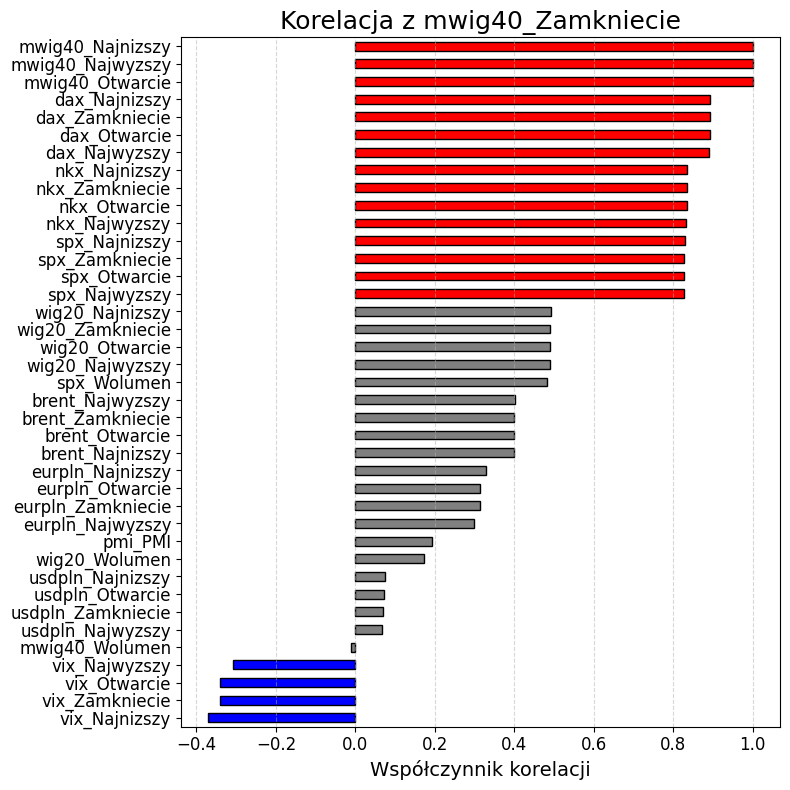

In [9]:
target = 'mwig40_Zamkniecie'

if target in corr_matrix.columns:
    plt.figure(figsize=(8, 8))
    
    # Sortowanie
    target_corr = corr_matrix[target].sort_values(ascending=True).drop(target)
    
    # Kolorowanie
    colors = ['red' if x > 0.7 else ('blue' if x < -0.3 else 'gray') for x in target_corr.values]
    
    # Wykres
    target_corr.plot(kind='barh', color=colors, edgecolor='black')
    
    plt.title(f'Korelacja z {target}', fontsize=TITLE_FONT_SIZE)
    plt.xlabel('Współczynnik korelacji', fontsize=AXIS_FONT_SIZE)
    plt.yticks(fontsize=TICK_FONT_SIZE)
    plt.xticks(fontsize=TICK_FONT_SIZE)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig(PLOTS_DIR + f'/correlation_with_{target}.png', dpi=200)
    plt.show()
    plt.close()

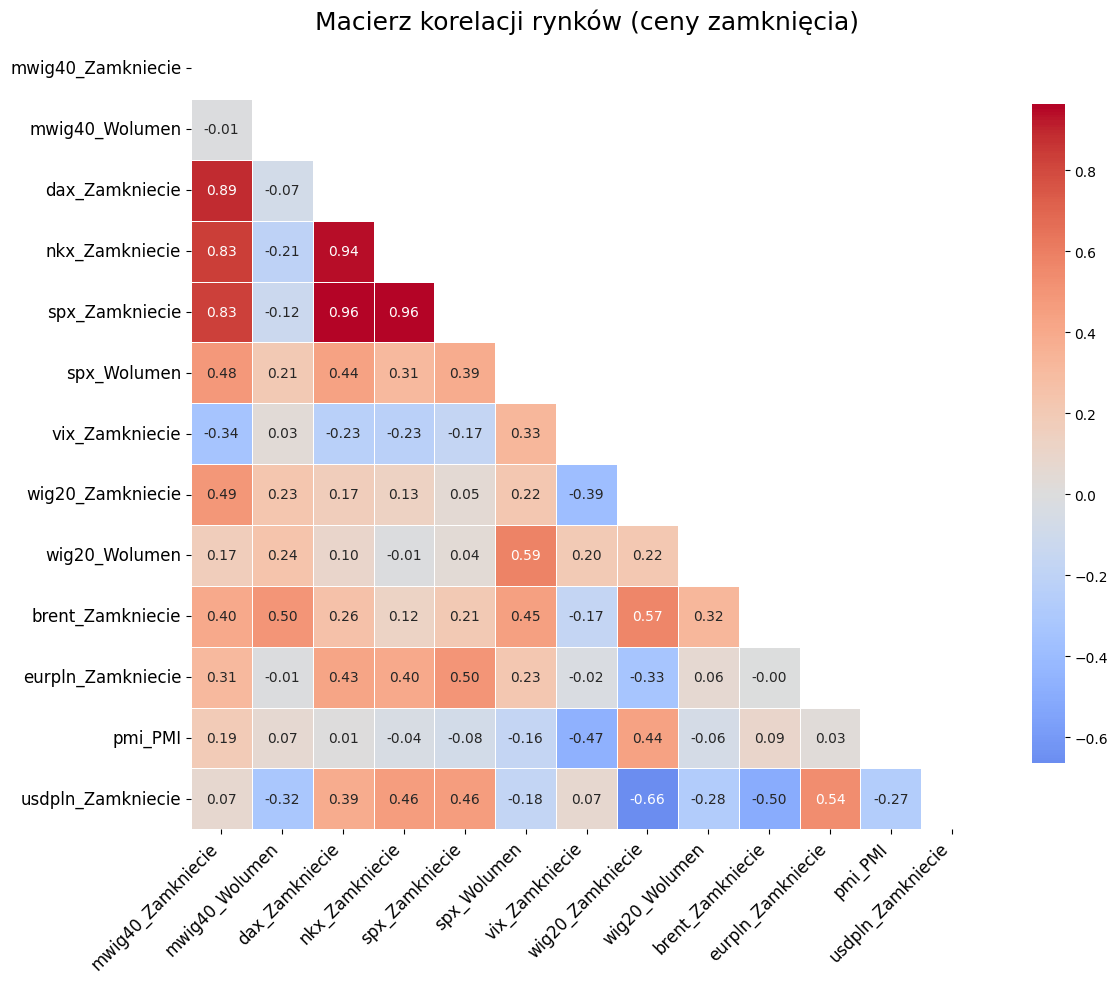

In [10]:
cols_to_keep = [col for col in df.columns if 'Zamkniecie' in col or 'PMI' in col or 'Wolumen' in col]
df_reduced = df[cols_to_keep]

# Obliczenie macierzy korelacji
corr_matrix = df_reduced.corr()

# Heatmapa korelacji
plt.figure(figsize=(12, 10))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(
    corr_matrix, 
    mask=mask, 
    cmap='coolwarm', 
    center=0, 
    square=True, 
    linewidths=.5,
    annot=True,
    fmt=".2f",
    cbar_kws={"shrink": 0.8}
)

plt.title('Macierz korelacji rynków (ceny zamknięcia)', fontsize=TITLE_FONT_SIZE)
plt.xticks(rotation=45, ha='right', fontsize=TICK_FONT_SIZE)
plt.yticks(fontsize=TICK_FONT_SIZE)
plt.tight_layout()

# Zapis i wyświetlenie
save_path_heatmap = os.path.join(PLOTS_DIR, 'correlation_matrix_reduced.png')
plt.savefig(save_path_heatmap)
plt.show()
plt.close()

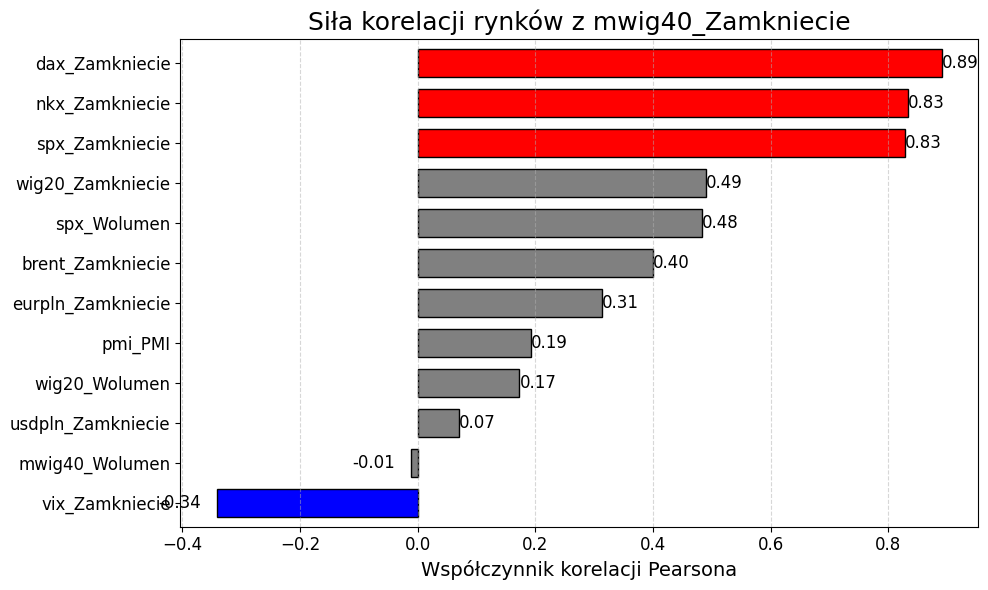

In [11]:
# Barplot 
target = 'mwig40_Zamkniecie'

if target in corr_matrix.columns:
    plt.figure(figsize=(10, 6))
    
    # Sortowanie od najmniejszej do największej i usunięcie autokorelacji (1.0)
    target_corr = corr_matrix[target].sort_values(ascending=True).drop(target)
    
    # Logika kolorowania: Silna dodatnia (>0.7) = Czerwony, Silna ujemna (<-0.3) = Niebieski, Reszta = Szary
    colors = ['red' if x > 0.7 else ('blue' if x < -0.3 else 'gray') for x in target_corr.values]
    
    # Rysowanie wykresu
    ax = target_corr.plot(kind='barh', color=colors, edgecolor='black', width=0.7)
    
    plt.title(f'Siła korelacji rynków z {target}', fontsize=TITLE_FONT_SIZE)
    plt.xlabel('Współczynnik korelacji Pearsona', fontsize=AXIS_FONT_SIZE)
    plt.yticks(fontsize=TICK_FONT_SIZE)
    plt.xticks(fontsize=TICK_FONT_SIZE)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    
    # Dodanie wartości liczbowych obok słupków dla czytelności
    for i, v in enumerate(target_corr.values):
        ax.text(v if v > 0 else v - 0.1, i, f'{v:.2f}', 
                va='center', fontsize=TICK_FONT_SIZE, 
                color='black' if abs(v) < 0.7 else 'black') # opcjonalnie zmiana koloru tekstu

    plt.tight_layout()
    
    save_path_bar = os.path.join(PLOTS_DIR, f'correlation_with_{target}_reduced.png')
    plt.savefig(save_path_bar, dpi=200)
    plt.show()
    plt.close()

## Dane do lstm i cart
Dodałem wskaźniki RSI, MACD, zmienność, Bollinger'a

In [4]:
df_lstm = pd.read_csv(DATA_RET_PATH, sep=';', decimal=',')
df_lstm.head()

if 'Data' in df_lstm.columns:
    df_lstm['Data'] = pd.to_datetime(df_lstm['Data'])
    df_lstm = df_lstm.set_index('Data').sort_index()

In [5]:
# Konfiguracja parametrów
TARGET_COL = 'mWIG40_Ret'
N_LAGS = 14
SPLIT_DATE = '2022-01-03'

# 1. Przetwarzanie CAŁEGO zbioru danych
df_processed = df_lstm.copy()

numeric_cols = df_processed.select_dtypes(include=[np.number]).columns

print(f"Generowanie lagów (1-{N_LAGS}) dla całego zbioru...")

# Lista na nowe kolumny
new_columns = [] 

for col in numeric_cols:
    for i in range(1, N_LAGS + 1):
        lag_series = df_processed[col].shift(i)
        lag_series.name = f'{col}_Lag_{i}'
        new_columns.append(lag_series)

# Łączenie wszystkiego w całość
df_processed = pd.concat([df_processed] + new_columns, axis=1)
df_processed = df_processed.dropna()

df_processed.to_csv(OUTPUT_DATA_LAGGED, sep=';', decimal=',')
print(f"Zapisano kompletny dataset (trening + test) do: {OUTPUT_DATA_LAGGED}")

mask_train = df_processed.index < SPLIT_DATE
df_analysis_train = df_processed.loc[mask_train]

feature_cols = [c for c in df_analysis_train.columns if '_Lag_' in c]
X = df_analysis_train[feature_cols]
y = df_analysis_train[TARGET_COL]

print("\n--- Zbiór treningowy do analizy cech ---")
print(f"Liczba cech: {len(feature_cols)}")
print(f"Liczba obserwacji (trening): {len(X)}")

Generowanie lagów (1-14) dla całego zbioru...
Zapisano kompletny dataset (trening + test) do: /home/rafal/BEng-thesis-code/BENG-thesis_code/dataset_ret_lag.csv

--- Zbiór treningowy do analizy cech ---
Liczba cech: 238
Liczba obserwacji (trening): 5473


/tmp/ipykernel_79008/2075838921.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation', y='Feature', data=corr_df.head(20), palette=colors, legend=False)


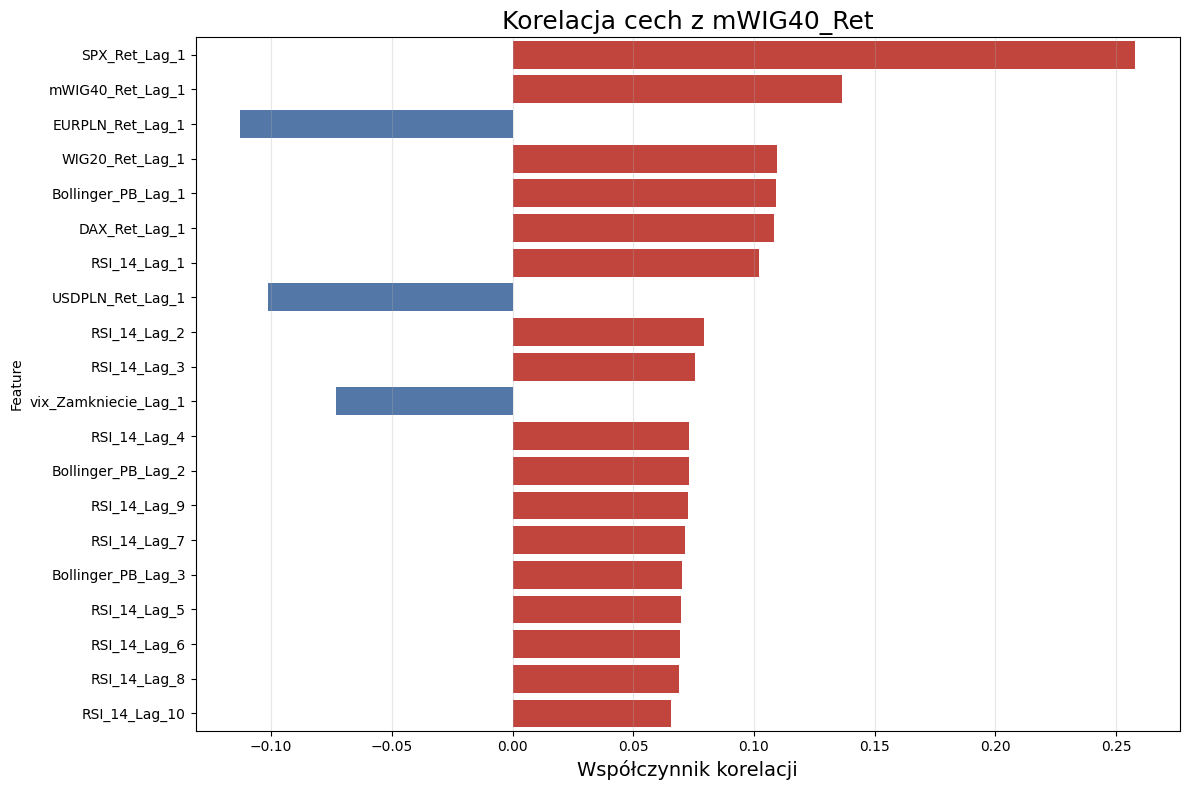

In [6]:
# Obliczenie korelacji
correlations = X.apply(lambda x: x.corr(y))

# Ranking
corr_df = pd.DataFrame({'Feature': X.columns, 'Correlation': correlations})
corr_df['Abs_Correlation'] = corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by='Abs_Correlation', ascending=False)

# Wizualizacja - opcja 1: Kolory zależne od znaku korelacji
plt.figure(figsize=(12, 8))
colors = ['#d73027' if x > 0 else '#4575b4' for x in corr_df.head(20)['Correlation']]
sns.barplot(x='Correlation', y='Feature', data=corr_df.head(20), palette=colors, legend=False)
plt.title(f'Korelacja cech z {TARGET_COL}', fontsize=TITLE_FONT_SIZE)
plt.xlabel('Współczynnik korelacji', fontsize=AXIS_FONT_SIZE)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
save_path = os.path.join(PLOTS_DIR, f'correlation_with_{TARGET_COL}.png')
plt.savefig(save_path, dpi=200)
plt.show()

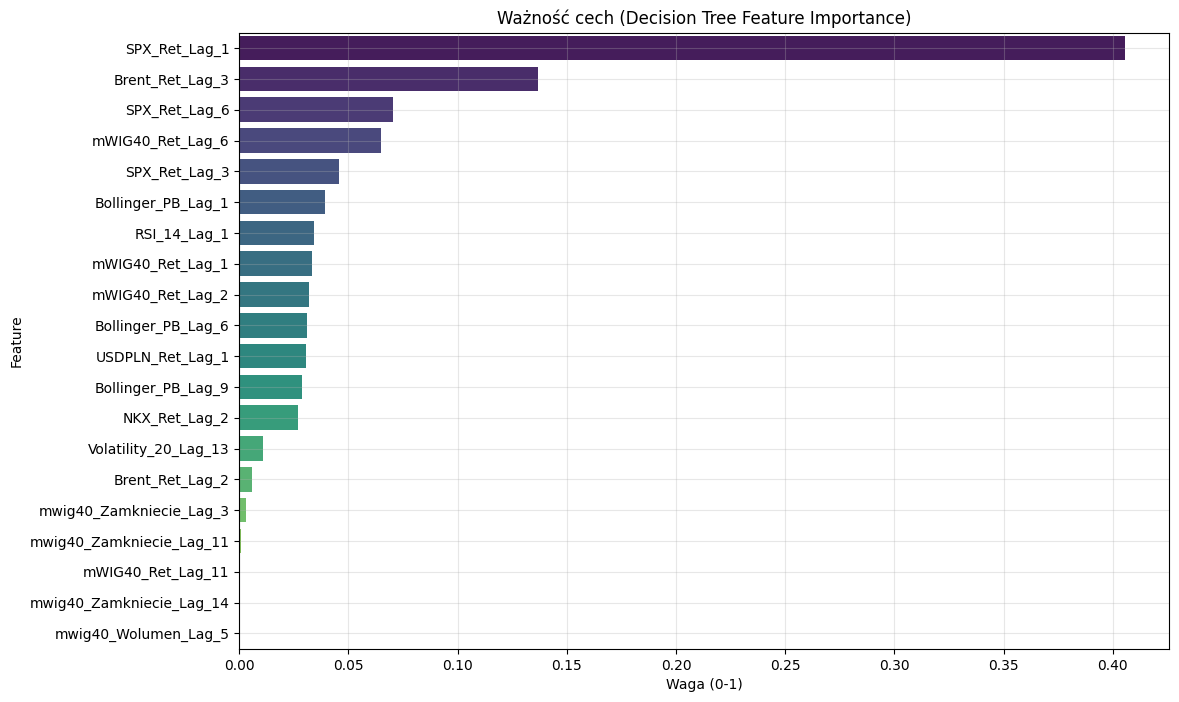

In [7]:
from sklearn.tree import DecisionTreeRegressor

# Trening drzewa
model_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
model_tree.fit(X, y)

# Ranking ważności
importances = model_tree.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

# Wizualizacja
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df.head(20),hue='Feature', palette='viridis')
plt.title('Ważność cech (Decision Tree Feature Importance)')
plt.xlabel('Waga (0-1)')
plt.grid(True, alpha=0.3)
save_path = os.path.join(PLOTS_DIR, 'feature_importance_tree.png')
plt.savefig(save_path, dpi=200)
plt.show()

In [8]:
from sklearn.feature_selection import RFE

print("Selekcja RFE")

# Wybór 10 najlepszych cech
n_features_select = 20
estimator = DecisionTreeRegressor(max_depth=5, random_state=42)

rfe = RFE(estimator=estimator, n_features_to_select=n_features_select)
rfe.fit(X, y)

# Wyniki
selected_features = X.columns[rfe.support_]

print(f"\nWybrane {n_features_select} najlepszych cech wg RFE:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i}. {feature}")

Selekcja RFE

Wybrane 20 najlepszych cech wg RFE:
1. mWIG40_Ret_Lag_1
2. mWIG40_Ret_Lag_2
3. mWIG40_Ret_Lag_6
4. RSI_14_Lag_1
5. Bollinger_PB_Lag_1
6. Bollinger_PB_Lag_6
7. Bollinger_PB_Lag_9
8. SPX_Ret_Lag_1
9. SPX_Ret_Lag_3
10. SPX_Ret_Lag_6
11. NKX_Ret_Lag_2
12. Brent_Ret_Lag_3
13. USDPLN_Ret_Lag_1
14. WIG20_Ret_Lag_4
15. vix_Zamkniecie_Lag_3
16. vix_Zamkniecie_Lag_10
17. vix_Zamkniecie_Lag_11
18. vix_Zamkniecie_Lag_12
19. vix_Zamkniecie_Lag_13
20. vix_Zamkniecie_Lag_14


Mutual Information


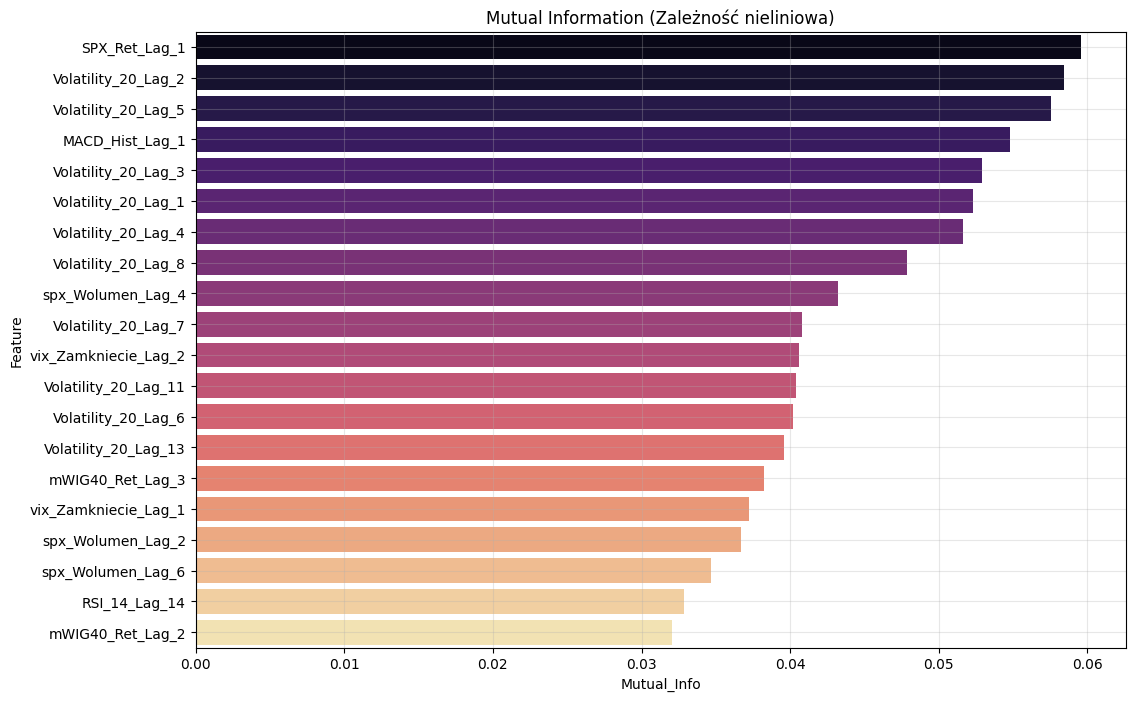

In [9]:
from sklearn.feature_selection import mutual_info_regression

print("Mutual Information")

mi_scores = mutual_info_regression(X, y, random_state=42)

mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual_Info': mi_scores})
mi_df = mi_df.sort_values(by='Mutual_Info', ascending=False)

# Wizualizacja
plt.figure(figsize=(12, 8))
sns.barplot(x='Mutual_Info', y='Feature', data=mi_df.head(20),hue='Feature', palette='magma')
plt.title('Mutual Information (Zależność nieliniowa)')
plt.grid(True, alpha=0.3)
save_path = os.path.join(PLOTS_DIR, 'mutual_information.png')
plt.savefig(save_path, dpi=200)
plt.show()